In [1]:
train = pd.read_csv("./raw/application_train.csv")

변수명
- train_target0 : target 값이 0인 전체 데이터
- train_target1 : target 값이 1인 전체 데이터
- conti_target0 : target 값이 0인 데이터 중 연속변수
- conti_target1 : target 값이 1인 데이터 중 연속변수
- class_target0 : target 값이 0인 데이터 중 categorical 변수
- class_target1 : target 값이 1인 데이터 중 categorical 변수

In [8]:
train.describe(include=["object", "category"])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [2]:
train_target0 = train[train["TARGET"]==0]
train_target1 = train[train["TARGET"]==1]

In [3]:
# continuous 변수들
continuous_columns = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY",
                      "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED",
                      "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "OWN_CAR_AGE", "CNT_FAM_MEMBERS",
                      "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "OBS_30_CNT_SOCIAL_CIRCLE" ,
                      "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
                      "DAYS_LAST_PHONE_CHANGE"]

building_info_continuous = ["APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG",
                 "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG",
                 "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG",
                 "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE",
                 "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE",
                 "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE",
                 "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI",
                 "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI",
                 "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI",
                 "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "TOTALAREA_MODE"]

In [4]:
# categorical 변수들
class_columns = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
                 "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
                 "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL",
                 "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE",
                 "FLAG_EMAIL", "OCCUPATION_TYPE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
                 "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION",
                 "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
                 "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE",
                 "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK",
                 "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

flag_document_class = ["FLAG_DOCUMENT_" + str(i) for i in range(2, 22)]

building_info_class = ["FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"]

---

In [5]:
# target 변수에 따라 categorical 변수 비교

# Target 1의 categorical 변수만
class_target1 = pd.DataFrame()
for i in class_columns+flag_document_class+building_info_class+["TARGET", "SK_ID_CURR"]:
    class_target1[i] = train_target1[i].astype(object)

vs1 = class_target1.describe(include=["category", "object"]).T

# Target 0의 categorical 변수만
class_target0 = pd.DataFrame()
for i in class_columns+flag_document_class+building_info_class+["TARGET", "SK_ID_CURR"]:
    class_target0[i] = train_target0[i].astype(object)

vs0 = class_target0.describe(include=["category", "object"]).T

vs1["rate"] = vs1["freq"] / vs1["count"] * 100
vs0["rate"] = vs0["freq"] / vs0["count"] * 100

In [6]:
pd.concat([vs0, vs1], axis=1)

,count,unique,top,freq,rate,count,unique,top,freq,rate
NAME_CONTRACT_TYPE,282686,2,Cash loans,255011,90.21,24825,2,Cash loans,23221,93.5388
CODE_GENDER,282686,3,F,188278,66.6032,24825,2,F,14170,57.0796
FLAG_OWN_CAR,282686,2,N,185675,65.6824,24825,2,N,17249,69.4824
FLAG_OWN_REALTY,282686,2,Y,196329,69.4513,24825,2,Y,16983,68.4109
NAME_TYPE_SUITE,281464,7,Unaccompanied,228189,81.0722,24755,7,Unaccompanied,20337,82.1531
NAME_INCOME_TYPE,282686,8,Working,143550,50.7807,24825,6,Working,15224,61.3253
NAME_EDUCATION_TYPE,282686,5,Secondary / secondary special,198867,70.3491,24825,5,Secondary / secondary special,19524,78.6465
NAME_FAMILY_STATUS,282686,6,Married,181582,64.2345,24825,5,Married,14850,59.8187
NAME_HOUSING_TYPE,282686,6,House / apartment,251596,89.0019,24825,6,House / apartment,21272,85.6878
FLAG_MOBIL,282686,2,1,282685,99.9996,24825,1,1,24825,100


- 대부분 90%이상 cash loans
- 신청한 비율 중 여성의 비율이 더 많음

$$\text{target 0과 1의 비율 비교}$$

|변수명 | freq | 0 | 1 |
| - | - | - | - |
|CODE_GENDER | F | 66.6% | 57.1% | 
|FLAG_OWN_CAR | N | 65.7% | 69.5% |
|NAME_INCOME_TYPE | Working | 50% | 61% | 일을 하고 있는 사람이 더 많은데도 연체
|NAME_EDUCATION_TYPE | Secondary / secondary special | 70.3% | 78.6% |
|NAME_FAMILY_STATUS | married | 64.2% | 59.8% |
|REG_CITY_NOT_LIVE_CITY | 0 | 92.5% | 88.1% |
|REG_CITY_NOT_WORK_CITY | 0 | 77.6% | 69.7% |
|LIVE_CITY_NOT_WORK_CITY | 0 | 82.4% | 77.8% |


In [7]:
# target이 0, 1일 때 NAME_INCOME_TYPE 자세히 보기
print(class_target0.groupby("NAME_INCOME_TYPE")["SK_ID_CURR"].count())
print(class_target1.groupby("NAME_INCOME_TYPE")["SK_ID_CURR"].count())

NAME_INCOME_TYPE
Businessman                 10
Commercial associate     66257
Maternity leave              3
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Working                 143550
Name: SK_ID_CURR, dtype: int64
NAME_INCOME_TYPE
Commercial associate     5360
Maternity leave             2
Pensioner                2982
State servant            1249
Unemployed                  8
Working                 15224
Name: SK_ID_CURR, dtype: int64


In [60]:
train["WEEKDAY_APPR_PROCESS_START"].unique()
train.groupby("WEEKDAY_APPR_PROCESS_START")["SK_ID_CURR"].count()

WEEKDAY_APPR_PROCESS_START
FRIDAY       50338
MONDAY       50714
SATURDAY     33852
SUNDAY       16181
THURSDAY     50591
TUESDAY      53901
WEDNESDAY    51934
Name: SK_ID_CURR, dtype: int64

In [61]:
train["NAME_INCOME_TYPE"].unique()
train.groupby("NAME_INCOME_TYPE")["SK_ID_CURR"].count()

NAME_INCOME_TYPE
Businessman                 10
Commercial associate     71617
Maternity leave              5
Pensioner                55362
State servant            21703
Student                     18
Unemployed                  22
Working                 158774
Name: SK_ID_CURR, dtype: int64

In [8]:
# target과 각 categorical 변수의 chi-square p-value(H0 = 독립이다)
chi = pd.DataFrame(columns=["class_columns", "pvalue"])

for class_column in class_columns+flag_document_class+building_info_class:
    table = sm.stats.Table.from_data(train[["TARGET", class_column]])
    rslt = table.test_nominal_association()
    chi.loc[len(chi), "pvalue"] = rslt.pvalue
    
chi["class_columns"] = class_columns+flag_document_class+building_info_class

In [9]:
chi

,class_columns,pvalue
0,NAME_CONTRACT_TYPE,0
1,CODE_GENDER,0
2,FLAG_OWN_CAR,0
3,FLAG_OWN_REALTY,0.000650804
4,NAME_TYPE_SUITE,1.13293e-05
5,NAME_INCOME_TYPE,0
6,NAME_EDUCATION_TYPE,0
7,NAME_FAMILY_STATUS,0
8,NAME_HOUSING_TYPE,0
9,FLAG_MOBIL,0.379554


In [13]:
chi[chi.pvalue < 0.05].sort_values("pvalue")

,class_columns,pvalue
0,NAME_CONTRACT_TYPE,0
37,FLAG_DOCUMENT_6,0
34,FLAG_DOCUMENT_3,0
32,AMT_REQ_CREDIT_BUREAU_YEAR,0
31,AMT_REQ_CREDIT_BUREAU_QRT,0
26,ORGANIZATION_TYPE,0
25,LIVE_CITY_NOT_WORK_CITY,0
55,WALLSMATERIAL_MODE,0
23,REG_CITY_NOT_LIVE_CITY,0
19,HOUR_APPR_PROCESS_START,0


In [10]:
train["count"] = 1

In [11]:
a = pd.crosstab(train["NAME_TYPE_SUITE"], train["TARGET"], train["count"], aggfunc=sum)
a

TARGET,0,1
NAME_TYPE_SUITE,,
Children,3026,241
Family,37140,3009
Group of people,248,23
Other_A,790,76
Other_B,1596,174
"Spouse, partner",10475,895
Unaccompanied,228189,20337


In [80]:
# dropna()한 target과 각 categorical 변수의 chi-square p-value(H0 = 독립이다)
chi = pd.DataFrame(columns=["class_columns", "pvalue"])

for class_column in class_columns+flag_document_class+building_info_class:
    table = sm.stats.Table.from_data(train[["TARGET", class_column]].dropna())
    rslt = table.test_nominal_association()
    chi.loc[len(chi), "pvalue"] = rslt.pvalue
    
chi["class_columns"] = class_columns+flag_document_class+building_info_class

In [81]:
chi

,class_columns,pvalue
0,NAME_CONTRACT_TYPE,0
1,CODE_GENDER,0
2,FLAG_OWN_CAR,0
3,FLAG_OWN_REALTY,0.000650804
4,NAME_TYPE_SUITE,1.13293e-05
5,NAME_INCOME_TYPE,0
6,NAME_EDUCATION_TYPE,0
7,NAME_FAMILY_STATUS,0
8,NAME_HOUSING_TYPE,0
9,FLAG_MOBIL,0.379554


In [82]:
chi[chi.pvalue < 0.05].sort_values("pvalue")

,class_columns,pvalue
0,NAME_CONTRACT_TYPE,0
37,FLAG_DOCUMENT_6,0
34,FLAG_DOCUMENT_3,0
32,AMT_REQ_CREDIT_BUREAU_YEAR,0
31,AMT_REQ_CREDIT_BUREAU_QRT,0
26,ORGANIZATION_TYPE,0
25,LIVE_CITY_NOT_WORK_CITY,0
55,WALLSMATERIAL_MODE,0
23,REG_CITY_NOT_LIVE_CITY,0
19,HOUR_APPR_PROCESS_START,0


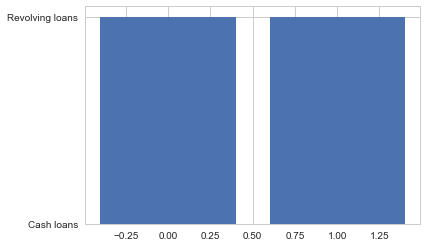

In [85]:
%matplotlib inline
plt.bar(train.TARGET, train.NAME_CONTRACT_TYPE)
plt.show()

In [30]:
# credit_card 중에서 train 데이터의 수
a = len(credit_card[credit_card["SK_ID_CURR"].isin(set(train.SK_ID_CURR))])

# train 데이터 중에서 credit_card에 없는 ID의 수
b = len(set(train.SK_ID_CURR) - set(credit_card.SK_ID_CURR))

# train과 credit_card를 merge 했을 때 개수 3448571 개
a + b

3227965

In [29]:
# credit_card 중에서 train 데이터의 수
#a = len(credit_card[credit_card["SK_ID_CURR"].isin(set(train.SK_ID_CURR))])

# installments_payments 중에서 train 데이터의 수
#b = len(installments_payment[installments_payment["SK_ID_CURR"].isin(set(train.SK_ID_CURR))])

# credit_card 파일과 installments_payments파일에 둘다 ID가 동시에 있는 경우는 
# train 파일의 전체 307511 중 86905개 
c = len(set(installments_payment.SK_ID_CURR) & set(credit_card.SK_ID_CURR))

a + b - c

103285

In [23]:
np.bincount(train["TARGET"])

array([282686,  24825], dtype=int64)

In [18]:
len(set(train.SK_ID_CURR.unique()) - set(test.SK_ID_CURR.unique()))

307511

In [12]:
len(set(credit_card.SK_ID_CURR.unique()))

103558

In [14]:
len(set(test.SK_ID_CURR.unique()))

48744

In [8]:
# credit_card 파일과 train 파일에 둘다 ID가 동시에 있는 경우는 
# train 파일의 전체 307511 중 86905개 
len(set(train.SK_ID_CURR) & set(credit_card.SK_ID_CURR))

86905

In [11]:
# credit_card 파일과 test 파일에 둘다 ID가 동시에 있는 경우는 
# test 파일의 전체 48744 중 16653개 
len(set(test.SK_ID_CURR) & set(credit_card.SK_ID_CURR))

16653

In [25]:
# bureau 파일과 train 파일에 둘다 ID가 동시에 있는 경우는 
# train 파일의 전체 307511 중 263491개 
len(set(train.SK_ID_CURR.unique())) - len(set(train.SK_ID_CURR.unique()) - set(bureau.SK_ID_CURR.unique()))

263491

In [28]:
# bureau 파일과 test 파일에 둘다 ID가 동시에 있는 경우는 
# test 파일의 전체 48744 중 42320 
len(set(test.SK_ID_CURR.unique())) - len(set(test.SK_ID_CURR.unique()) - set(bureau.SK_ID_CURR.unique()))

42320

In [45]:
# installments 파일과 train 파일에 둘다 ID가 동시에 있는 경우는 
# train 파일의 전체 307511 중 263491개 
len(set(train.SK_ID_CURR.unique())) - len(set(train.SK_ID_CURR.unique()) - set(installments.SK_ID_CURR.unique()))

291643

In [46]:
# installments 파일과 test 파일에 둘다 ID가 동시에 있는 경우는 
# test 파일의 전체 48744 중 47944
len(set(test.SK_ID_CURR.unique())) - len(set(test.SK_ID_CURR.unique()) - set(installments.SK_ID_CURR.unique()))

47944

In [54]:
len(set(bureau.SK_ID_CURR) & set(installments.SK_ID_CURR))

291704

In [38]:
len(set(bureau.SK_ID_CURR))

305811

In [15]:
len(set(test.SK_ID_CURR.unique()) - set(credit_card.SK_ID_CURR.unique()))

32091